In [13]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
path_to_file = '/content/drive/MyDrive/Projects/amazon_cells_labelled.txt'

In [15]:
data = pd.read_csv(path_to_file, sep='\t', header=None)
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [16]:
X = data.iloc[:,0] # extract column with review
y = data.iloc[:,-1] # extract column with sentiment

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)
X_vec = X_vec.todense() # convert sparse matrix into dense matrix
X_vec

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# Transform data by applying term frequency inverse document frequency (TF-IDF) 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
#Naive Bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 87  33]
 [ 20 110]]


              precision    recall  f1-score   support

           0       0.81      0.72      0.77       120
           1       0.77      0.85      0.81       130

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [26]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[102  18]
 [ 33  97]]


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       120
           1       0.84      0.75      0.79       130

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [39]:
data.groupby(data[1]).describe()

text length                                                  
        count    mean        std   min   25%   50%   75%    max
1                                                              
0       500.0  56.824  34.022464  11.0  29.0  52.0  77.0  149.0
1       500.0  53.628  35.234764  11.0  25.0  43.0  78.0  148.0

In [31]:
data['text length'] = data[0].apply(len)

In [32]:
data.head()

,0,1,text length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc86d4950>,
      dtype=object)

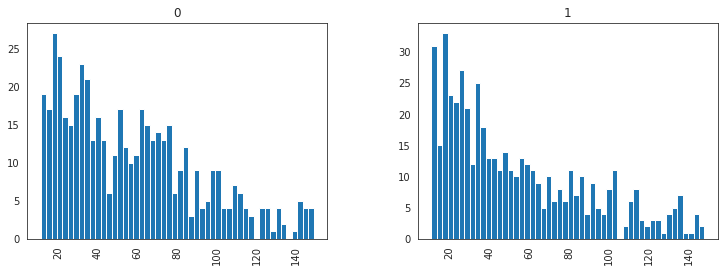

In [35]:
# Text length does not seem to affect rating
data.hist(column='text length', by=1, bins=50,figsize=(12,4))